<a href="https://colab.research.google.com/github/jerome-keli/Cyberbullying-detection/blob/main/Cyber_bullying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **About Dataset**
As social media usage becomes increasingly prevalent in every age group, a vast majority of citizens rely on this essential medium for day-to-day communication. Social media’s ubiquity means that cyberbullying can effectively impact anyone at any time or anywhere, and the relative anonymity
of the internet makes such personal attacks more difficult to stop than traditional bullying.

On April 15th, 2020, UNICEF issued a warning in response to the increased risk of cyberbullying during the COVID-19 pandemic due to widespread school closures, increased screen time, and decreased face-to-face social interaction. The statistics of cyberbullying are outright alarming: 36.5% of middle and high school students have felt cyberbullied and 87% have observed cyberbullying, with effects ranging from decreased academic performance to depression to suicidal thoughts.

In light of all of this, this dataset contains more than 47000 tweets labelled according to the class of cyberbullying:

Age\
Ethnicity;\
Gender;\
Religion;
Other type of cyberbullying;\
Not cyberbullying\
The data has been balanced in order to contain ~8000 of each class.

Trigger Warning These tweets either describe a bullying event or are the offense themselves, therefore explore it to the point where you feel comfortable.

www.kaggle.com. (n.d.). Cyberbullying Classification. [online] Available at: https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification/data.

## **Business Problem**
The task involves detecting and classifying cyberbullying tweets into different categories (eg, gender, ethnicity, religion) to enable social media platforms to put a stop to harmful behavior. The goal is to automatically identify offensive content for effective content moderation by leveraging machine learning algorithms.

## **Importing relevant libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import re

## **Data Exploration**

In this phase, I dive into the dataset containing tweets labeled for cyberbullying. The purpose here is to get a good grasp of the dataset's structure and content. I check for any potential issues like missing values or duplicate entries to ensure the data is clean for further analysis. Understanding the data at this stage is crucial before moving on to more complex processing steps.

In [ ]:
#Loading the dataset
df = pd.read_csv('/content/cyberbullying_tweets.csv')

In [ ]:
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [ ]:
df.describe()

,tweet_text,cyberbullying_type
count,47692,47692
unique,46017,6
top,RT @sailorhg: the intro for my hardware hackin...,religion
freq,2,7998


## **Data Preprocessing**

I need to clean it up before feeding the text data into machine learning models. This involves several steps:



*   **Removing Unwanted Elements**: Stripping out URLs, user mentions (@usernames), hashtags and unnecessary punctuations
*   **Standardizing Text**: All text is converted to lowercase to maintain consistency.
*   **Cleaning the data**: Removing duplicates and further cleaning the data.




The goal of preprocessing is to reduce noise in the data which allows me to focus on the words that truly matter. This clean, standardized text is essential for improving the performance of my models.

A word cloud is also created to see the words they associate with each cyberbullying type. This makes us understand the dataset better and know how to proceed.

In [ ]:
#Function to clean the tweet text
def clean_text(text):
    #Remove URLs
    text = re.sub(r'http\S+', '', text)
    #Remove mentions
    text = re.sub(r'@\w+', '', text)
    #Remove hashtags
    text = re.sub(r'#\w+', '', text)
    #Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    #Convert to lowercase
    text = text.lower().strip()
    return text

In [ ]:
#Applying the cleaning function to the dataset
df['clean_tweets'] = df['tweet_text'].apply(clean_text)

#Checking for duplicates and null values
df.drop_duplicates(subset='clean_tweets', inplace=True)
df.dropna(inplace=True)


#Showing a few samples of the cleaned data
df.sample(10)

,tweet_text,cyberbullying_type,clean_tweets
23793,RT @PamelaGeller: UK: Hundreds more Muslim chi...,religion,rt uk hundreds more muslim child rape gang ca...
26459,RT @Lauraka09619649: I bet #Tucker takes an in...,other_cyberbullying,rt i bet takes an industrial strength xanax ...
17098,This idiot. Ozil spoke about those Muslims mon...,religion,this idiot ozil spoke about those muslims mont...
28360,@Ronnie_Grether a bad bitch like you can be wh...,other_cyberbullying,a bad bitch like you can be whatever you want
4573,I woudnt really go out with an 18 yr old as th...,not_cyberbullying,i woudnt really go out with an 18 yr old as th...
3424,The jokes and puns are flying free in this cam...,not_cyberbullying,the jokes and puns are flying free in this cam...
15632,Straight white men object to being told off fo...,gender,straight white men object to being told off fo...
40916,michael clifford from 5sos fuck you you dumb a...,ethnicity,michael clifford from 5sos fuck you you dumb a...
12926,"RT @BanterUtd: @MT8_9 @cflfrances hahahaha, th...",gender,rt hahahaha the single greatest tweet ever ...
39513,i would have the biggest crush on him and bull...,age,i would have the biggest crush on him and bull...


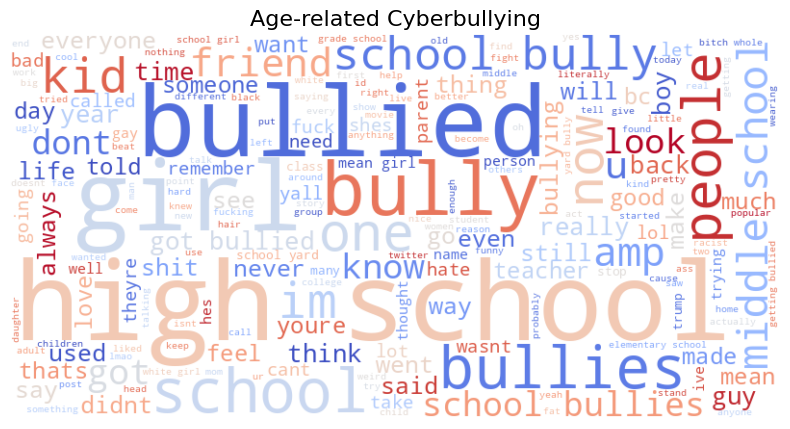

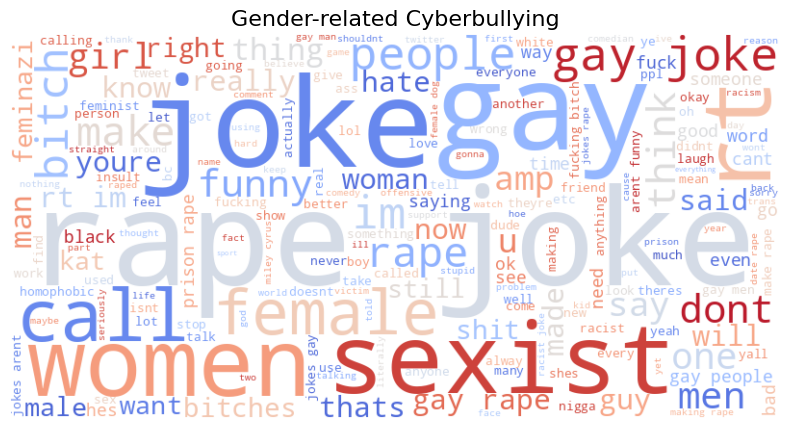

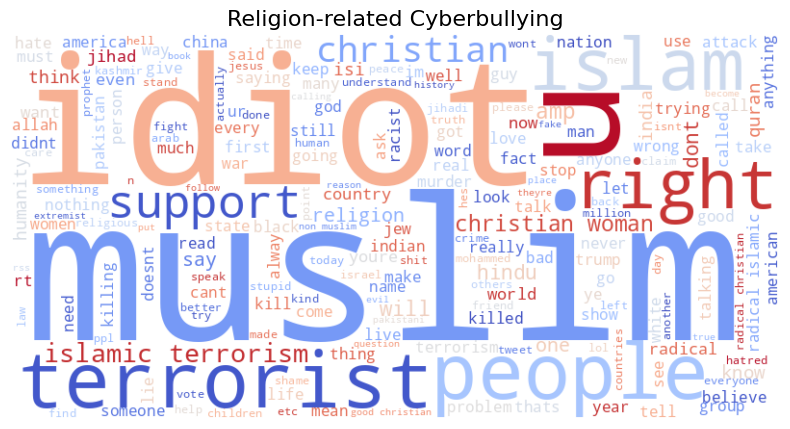

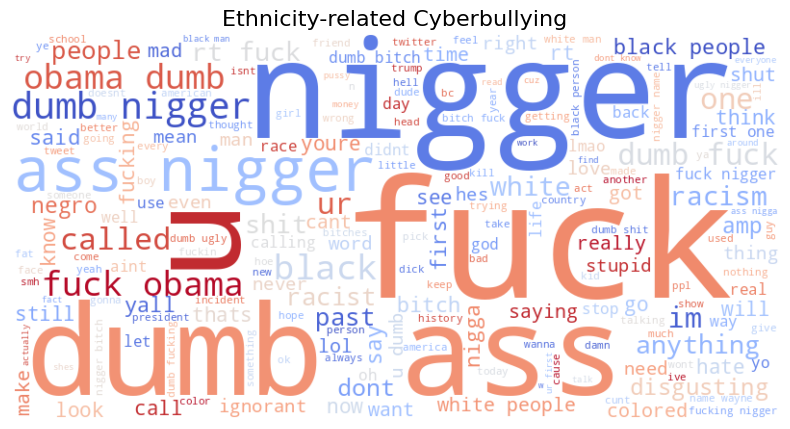

In [ ]:
#Function to generate word cloud for a specific class
def generate_word_cloud(category, title):
    subset = df[df['cyberbullying_type'] == category]
    text = ' '.join(subset['clean_tweets'].values)
    wordcloud = WordCloud(background_color='white', colormap='coolwarm', width=800, height=400).generate(text)

    #Plotting the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

#Generating word clouds for offensive categories
generate_word_cloud('age', 'Age-related Cyberbullying')
generate_word_cloud('gender', 'Gender-related Cyberbullying')
generate_word_cloud('religion', 'Religion-related Cyberbullying')
generate_word_cloud('ethnicity', 'Ethnicity-related Cyberbullying')

In [ ]:
#Mapping the sub categories in df['cyberbullying_type'] to numbers
cyberbullying_type = ['not_cyberbullying', 'gender', 'religion', 'age', 'ethnicity']
encoding_dict = {'not_cyberbullying':0, 'gender':1, 'religion':2, 'age':3, 'ethnicity':4}
df['cyberbullying_type'] = df['cyberbullying_type'].map(encoding_dict)
df.sample(5)

,tweet_text,cyberbullying_type,clean_tweets
8527,#MileyCyrus Miley Cyrus shocks fans with date-...,1.0,miley cyrus shocks fans with daterape joke dur...
14714,@Femitheist @trishesdishes ...many don't have ...,1.0,many dont have the awareness to operate in wha...
25476,Another fucking round of instant restaurants!!...,NaN,another fucking round of instant restaurants a...
4103,@hoes_luvdreads2 ok u ready now ?,0.0,ok u ready now
20972,Show me a video proof where RSS called themsel...,2.0,show me a video proof where rss called themsel...


In [ ]:
#Removing all the cyberbullying_type with no values

df = df.dropna(subset=['cyberbullying_type'])
df.sample(5)

,tweet_text,cyberbullying_type,clean_tweets
6875,RT @SarahSchwartz: More women have died from d...,0.0,rt more women have died from domestic violenc...
16978,@yuskan0723 Before the murdering prophet Moham...,2.0,before the murdering prophet mohammed came alo...
42291,"@steezjoweez Dumb Fuck Every Rapper Says ""Nigg...",4.0,dumb fuck every rapper says nigger in a song d...
10360,"So yes, I laugh at rape jokes, racist jokes, g...",1.0,so yes i laugh at rape jokes racist jokes gay ...
11099,RT @nathancharman I'm not sexist but hearing a...,1.0,rt im not sexist but hearing a group of drunk...


In [ ]:
#Checking the class distribution
class_counts = df['cyberbullying_type'].value_counts()
print(class_counts)

cyberbullying_type
2.0    7949
3.0    7928
4.0    7829
0.0    7679
1.0    7616
Name: count, dtype: int64


In [ ]:
#Removing all the outliers
df['word_count'] = df['tweet_text'].map(lambda x: len(x.split()))

#Removing the tweets with a word count between 3 and 100
df = df[df['word_count']>3]
df = df[df['word_count']<100]
df.reset_index(drop=True, inplace=True)
df.shape

<ipython-input-39-73f98c5ea9da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['tweet_text'].map(lambda x: len(x.split()))


(38604, 4)

## **Feature engineering**

Now that I have cleaned the tweets, I can transform it into a numerical format that machine learning models can understand. I use TF-IDF (Term Frequency-Inverse Document Frequency) vectorization for this purpose:



*   **TF-IDF**: This technique measures how important a word is to a document in a collection. Words that appear frequently in a document but not in many others get higher scores.
*   **Vectorization**: The TfidfVectorizer converts our text into numerical vectors suitable for model input.



This step is about turning text data into a form that algorithms can work with effectively.

I also split the dataset into three parts:



*   **Training Set (70%)**: Used to train the models.
*   **Validation Set (15%)**: Helps tune model parameters and evaluate performance during training.
*  **Test Set (15%)**: Used to assess the final performance of the model on unseen data.




This split ensures I can evaluate how well the models might perform in the real world and helps prevent overfitting.

In [ ]:
#Train-Validation-Test Split (70% Train, 15% Validation, 15% Test)
X = df['clean_tweets']  # Features (Cleaned text)
y = df['cyberbullying_type']  # Target (Encoded labels)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=76)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=76)

In [ ]:
#TF-IDF Vectorization on the training data
tfidf = TfidfVectorizer(ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
#The shape of the resulting TF-IDF matrices
X_train_tfidf.shape, X_val_tfidf.shape, X_test_tfidf.shape

((27022, 300485), (5791, 300485), (5791, 300485))

## **Model Training**

I train several models to see which performs best in classifying cyberbullying tweets:

* **Logistic Regression**: A simple yet effective algorithm for text classification.
* **Naive Bayes**: A probabilistic model that's often good with text data.
* **Random Forest**: An ensemble method that builds multiple decision trees for better accuracy.\
I assess each model using metrics like:



*   **Precision**: The ratio of correctly predicted positive observations to total predicted positives.
*   **Recall**: The ratio of correctly predicted positives to all actual positives.
* **F1-Score**: The weighted average of Precision and Recall.



Comparing these models will help me understand which one suits the task best.

In [ ]:
#Train Logistic Regression
lr_model = LogisticRegression(solver='saga', penalty='l2', random_state=394)
lr_model.fit(X_train_tfidf, y_train)

#Train Naive Bayes
nb_model = MultinomialNB(alpha=0.1)
nb_model.fit(X_train_tfidf, y_train)

#Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=30, random_state=27)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, random_state=27)

In [ ]:
#Predictions on the validation set
y_val_pred_lr = lr_model.predict(X_val_tfidf)
y_val_pred_nb = nb_model.predict(X_val_tfidf)
y_val_pred_rf = rf_model.predict(X_val_tfidf)


#Classification reports for each model on the validation set
lr_report = classification_report(y_val, y_val_pred_lr)
nb_report = classification_report(y_val, y_val_pred_nb)
rf_report = classification_report(y_val, y_val_pred_rf)

print("Logistic Regression Classification Report:\n", lr_report)
print("\nNaive Bayes Classification Report:\n", nb_report)
print("\nRandom Forest Classification Report:\n", rf_report)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.80      0.81      1104
         1.0       0.92      0.84      0.88      1134
         2.0       0.91      0.97      0.94      1192
         3.0       0.95      0.98      0.96      1188
         4.0       0.97      0.97      0.97      1173

    accuracy                           0.91      5791
   macro avg       0.91      0.91      0.91      5791
weighted avg       0.91      0.91      0.91      5791


Naive Bayes Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.43      0.58      1104
         1.0       0.87      0.84      0.85      1134
         2.0       0.80      0.98      0.88      1192
         3.0       0.77      0.98      0.86      1188
         4.0       0.89      0.91      0.90      1173

    accuracy                           0.83      5791
   macro avg       0.84      0.83      0.81      5

## **Model Testing**

In [ ]:
#Predictions on the test set using all models
y_test_pred_lr = lr_model.predict(X_test_tfidf)
y_test_pred_nb = nb_model.predict(X_test_tfidf)
y_test_pred_rf = rf_model.predict(X_test_tfidf)

#Classification reports for the test set
test_lr_report = classification_report(y_test, y_test_pred_lr)
test_nb_report = classification_report(y_test, y_test_pred_nb)
test_rf_report = classification_report(y_test, y_test_pred_rf)

print("Logistic Regression Classification Report:\n", test_lr_report)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.77      0.79      1104
         1.0       0.92      0.85      0.88      1134
         2.0       0.91      0.96      0.93      1192
         3.0       0.94      0.98      0.96      1187
         4.0       0.97      0.98      0.97      1174

    accuracy                           0.91      5791
   macro avg       0.91      0.91      0.91      5791
weighted avg       0.91      0.91      0.91      5791



### Logistic Regression Performance
Overall Accuracy: 91%

**Class 0 (Not Cyberbullying)**:
* **Precision**: 80%
* **Recall**: 77%
* **F1-Score**: 79%
* **Support**: 1104 instances\
The model correctly identifies 77% of the actual non-cyberbullying tweets. When it predicts a tweet as non-cyberbullying, it's correct 80% of the time.

**Classes 1 to 4 (Cyberbullying Categories)**:
* **High Precision and Recall**:
* **Gender (1)**: Precision 92%, Recall 85%
* **Religion (2**): Precision 91%, Recall 96%
* **Age (3)**: Precision 94%, Recall 98%
* **Ethnicity (4)**: Precision 97%, Recall 98%
The model performs exceptionally well in identifying cyberbullying related to religion, age, and ethnicity, with both precision and recall above 90%. This means it is both accurate and reliable in these categories.


In [ ]:
print("\nNaive Bayes Classification Report:\n", test_nb_report)


Naive Bayes Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.41      0.56      1104
         1.0       0.86      0.84      0.85      1134
         2.0       0.79      0.97      0.87      1192
         3.0       0.77      0.98      0.87      1187
         4.0       0.90      0.92      0.91      1174

    accuracy                           0.83      5791
   macro avg       0.84      0.82      0.81      5791
weighted avg       0.84      0.83      0.81      5791



Overall Accuracy: 83%

**Class 0 (Not Cyberbullying)**:

* **Precision**: 89%
* **Recall**: 41%
* **F1-Score**: 56%
* **Support**: 1104 instances
The model predicts non-cyberbullying tweets with high precision but low recall. It correctly identifies only 41% of actual non-cyberbullying tweets, indicating that many non-cyberbullying tweets are misclassified as cyberbullying.

**Classes 1 to 4 (Cyberbullying Categories)**:

* **Gender (1)**: Precision 86%, Recall 84%
* **Religion (2)**: Precision 79%, Recall 97%
* **Age (3)**: Precision 77%, Recall 98%
* **Ethnicity (4)**: Precision 90%, Recall 92%

The model shows high recall but varying precision across the cyberbullying categories. High recall in religion (97%) and age (98%) indicates that the model captures most actual instances in these categories. However, lower precision in religion (79%) and age (77%) suggests a higher rate of false positives which means that the model sometimes incorrectly labels non-offensive tweets as cyberbullying.

In [ ]:
print("\nRandom Forest Classification Report:\n", test_rf_report)


Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.86      0.78      1104
         1.0       0.95      0.75      0.84      1134
         2.0       0.89      0.93      0.91      1192
         3.0       0.96      0.96      0.96      1187
         4.0       0.96      0.94      0.95      1174

    accuracy                           0.89      5791
   macro avg       0.90      0.89      0.89      5791
weighted avg       0.90      0.89      0.89      5791



Random Forest Performance
Overall Accuracy: 89%

**Class 0 (Not Cyberbullying)**:

* **Precision**: 72%
* **Recall**: 86%
* **F1-Score**: 78%
* **Support**: 1104 instances

The model correctly identifies 86% of the actual non-cyberbullying tweets. However, when it predicts a tweet as non-cyberbullying, it's correct only 72% of the time. This indicates a higher rate of false positives when predicting this class.

**Classes 1 to 4(Cyberbullying Categories)**:


* **Gender (1)**: Precision 95%, Recall 75%
* **Religion (2)**: Precision 89%, Recall 93%
* **Age (3)**: Precision 96%, Recall 96%
* **Ethnicity (4)**: Precision 96%, Recall 94%

The model demonstrates high precision and recall in most cyberbullying categories,especially in age and ethnicity-related cyberbullying with both precision and recall above 94%. This indicates the model is accurate in predicting these categories. However, the lower recall in gender-related cyberbullying (75%) suggests the model misses some instances in this category.

In [ ]:
inverse_encoding_dict = {v: k for k, v in encoding_dict.items()}

def predict_tweet_category(tweet, model):
    cleaned_tweet = clean_text(tweet)  # Clean the input tweet
    transformed_tweet = tfidf.transform([cleaned_tweet])  # Transform into TF-IDF format
    prediction = model.predict(transformed_tweet)
    predicted_category = inverse_encoding_dict[prediction[0]]
    return predicted_category

#Sample offensive and non-offensive tweets to test the model
sample_tweets = [
    "I hate you and your family. You are worthless.",
    "This is the best day of my life!",
    "Christians are not welcome here.",
    "The weather is so beautiful today!",
    "All men are pigs, disgusting creatures.",
    "You're an amazing person and I'm glad I met you.",

]

#Test each sample tweet using the Logistic Regression model
predictions_lr = [(tweet, predict_tweet_category(tweet, lr_model)) for tweet in sample_tweets]

# Display the predictions
predictions_lr


[('I hate you and your family. You are worthless.', 'religion'),
 ('This is the best day of my life!', 'not_cyberbullying'),
 ('Christians are not welcome here.', 'religion'),
 ('The weather is so beautiful today!', 'not_cyberbullying'),
 ('All men are pigs, disgusting creatures.', 'gender'),
 ("You're an amazing person and I'm glad I met you.", 'not_cyberbullying')]

### **Testing on Sample Tweets**

**Expected Results:**


*   I hate you and your family. You are worthless. - **Ethnicity**
*   This is the best day of my life! - **Not_cyberbullying**
*  Christians are not welcome here - **Religion**
*  The weather is so beautiful today! - **Not_cyberbullying**
*  All men are pigs, disgusting creatures - **Gender**
* You're an amazing person and I'm glad I met you. - **Not_cyberbullying**



Logistic Regression model got 4/6

In [ ]:
#Test each sample tweet using the Naive-Bayes model
predictions_nb = [(tweet, predict_tweet_category(tweet, nb_model)) for tweet in sample_tweets]
predictions_nb

[('I hate you and your family. You are worthless.', 'ethnicity'),
 ('This is the best day of my life!', 'age'),
 ('Christians are not welcome here.', 'religion'),
 ('The weather is so beautiful today!', 'not_cyberbullying'),
 ('All men are pigs, disgusting creatures.', 'gender'),
 ("You're an amazing person and I'm glad I met you.", 'not_cyberbullying')]

Naive Bayes model got 5/6

In [ ]:
#Test each sample using the Random Forest model
predictions_rf = [(tweet, predict_tweet_category(tweet, rf_model)) for tweet in sample_tweets]
predictions_rf

[('I hate you and your family. You are worthless.', 'not_cyberbullying'),
 ('This is the best day of my life!', 'not_cyberbullying'),
 ('Christians are not welcome here.', 'not_cyberbullying'),
 ('The weather is so beautiful today!', 'not_cyberbullying'),
 ('All men are pigs, disgusting creatures.', 'not_cyberbullying'),
 ("You're an amazing person and I'm glad I met you.", 'not_cyberbullying')]

Random Forest model got 2/6 but they all have the same predictions.

Despite Naive Bayes having the lowest accuracy, it performed the best in the prediction test sample tweets. The random forest is defintely not the right model for this pipeline as it performed awfully.

## **Overall Interpretation**

**Model Strengths**:

*   Good at identifying clear instances of cyberbullying in specific categories. Both Naive bayes and Logistic Regression models were able to identify "gender" specific cyberbullying types. However, this could be because it was an easy sample tweet. They also did a decent job of identifying "religion", mainly Naive Bayes as it rightfully didn't assign the first example as "religion".


**Model Weaknesses**:
* Struggle with ambiguous categories like "not_cyberbullying." This was evident in both Naive Bayes and Random Forest models. The Random Forest model clearly had a problem because it could not distinguish any other cyberbullying type. On the other side, the Logiatic Regression model performed the best in this aspect as it managed to get all "not_cyberbullying" examples correct.
* Tend to produce false positives in non-offensive tweets. False postives is when a test incorrectly indicates the absence of something present. In this case, it fails to show there are non-offensive tweets such as in the Naive Bayes model.
* May miss subtle or indirect offensive language. This can be seen in the Random Forest model however, that model doesn't function properly so it is not the fairest assessment.

## **Voting Classifier**

The primary purpose of using a voting classifier is to improve the predictive accuracy by leveraging the strengths of multiple models. As seen above, some models perform better than others. The voting classifier can achieve better overall performance than any of the individual models I used by combining their outputs.

In [ ]:
#Model Training
from sklearn.ensemble import VotingClassifier

vot = VotingClassifier(estimators = [('lr', lr_model), ('nb',nb_model ), ('rf', rf_model)], voting='soft')
vot.fit(X_train_tfidf, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=394,
                                                 solver='saga')),
                             ('nb', MultinomialNB(alpha=0.1)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=30,
                                                     random_state=27))],
                 voting='soft')

In [ ]:
#Model Testing
y_val_pred_vc = vot.predict(X_val_tfidf)
y_test_pred_vc = vot.predict(X_test_tfidf)

print(classification_report(y_val, y_val_pred_vc))
print(classification_report(y_test, y_test_pred_vc))

              precision    recall  f1-score   support

         0.0       0.87      0.69      0.77      1104
         1.0       0.90      0.86      0.88      1134
         2.0       0.87      0.99      0.93      1192
         3.0       0.89      0.99      0.94      1188
         4.0       0.95      0.96      0.95      1173

    accuracy                           0.90      5791
   macro avg       0.90      0.90      0.89      5791
weighted avg       0.90      0.90      0.90      5791

              precision    recall  f1-score   support

         0.0       0.85      0.65      0.74      1104
         1.0       0.91      0.86      0.88      1134
         2.0       0.85      0.97      0.91      1192
         3.0       0.89      0.99      0.93      1187
         4.0       0.96      0.97      0.96      1174

    accuracy                           0.89      5791
   macro avg       0.89      0.89      0.89      5791
weighted avg       0.89      0.89      0.89      5791



### **Model Interpretability:**
The Voting Classifier combined the Logistic Regression, Naive Bayes and Random Forest. Key features like TF-IDF vectors allows me to identify which words and n-grams drive predictions, ensuring that human reviewers can understand and trust the model’s decisions.

### **Validation Set Results Interpretation:**
**Overall Accuracy**: 0.90\
The model correctly classified 90% of the instances in the validation set, which is a strong result.
* **Class 0**: Precision is 0.87, recall is 0.69 and F1-score is 0.77. This
indicates that the model struggles with class 0, as the recall  is quite low at 69%. This means the model is missing a significant portion of class 0.0 instances.
* **Class 1**: Precision is 0.90, recall is 0.86 and F1-score is 0.88. The performance here is quite balanced, with both precision and recall in the high 80s.
* **Class 2**: This class shows a very high recall of 0.99, meaning nearly all instances of class 2 are correctly identified. Precision is 0.87. This means that while most class 2 instances are found, some other classes might be misclassified as class 2.
* **Class 3 and 4**: These classes have very strong performance, with precision, recall, and F1-scores in the mid-90s, meaning the model is performing well at identifying these classes and making few mistakes.
Macro and Weighted Averages: Both macro and weighted averages are close to 0.90 indicating that the performance is fairly consistent across classes.

**Takeaways from Validation Set**:

The model performs well overall but it struggles the most with class 0, where recall is notably lower. Other classes, especially class 2, 3 and 4 perform very well, with high precision and recall according to the results.

**Test Set Results Interpretation**:
**Overall Accuracy**: 0.89

The test accuracy is slightly lower than the validation accuracy (0.90 vs 0.89) which is expected as the test set is unseen data.
* **Class 0**: Precision is 0.85, recall is 0.65 and F1-score is 0.74. The recall remains low for this class on the test set which means the model continues to miss many instances of class 0.
* **Class 1**: Precision is 0.91, recall is 0.86 and F1-score is 0.88 which is quite similar to the validation set performance. This shows the consistent behavior on both sets for this class.
* **Class 2**: Precision is 0.85, recall is 0.97 and F1-score is 0.91. The recall is very high again which shows that the model is very good at identifying class 2 instances but a slightly lower precision indicates that some other classes might be misclassified as class 2.
* **Class 3**: Precision is 0.89, recall is 0.99 and F1-score is 0.93. The model is again excellent at identifying this class as the recall is nearly perfect.
* **Class 4**: Precision is 0.96, recall is 0.97 and F1-score is 0.96. The model performs very well with class 4 just like the validation set. This shows that there is high reliability in predicting this class.
* **Macro and Weighted Averages**: Both macro and weighted averages are around 0.89. It is is consistent with the overall accuracy. This means that there is a strong performance across most classes though class 0 remains a weaker area.

In [ ]:
#Predictions
predictions_vc = [(tweet, predict_tweet_category(tweet, vot)) for tweet in sample_tweets]
predictions_vc

[('I hate you and your family. You are worthless.', 'religion'),
 ('This is the best day of my life!', 'not_cyberbullying'),
 ('Christians are not welcome here.', 'religion'),
 ('The weather is so beautiful today!', 'not_cyberbullying'),
 ('All men are pigs, disgusting creatures.', 'gender'),
 ("You're an amazing person and I'm glad I met you.", 'not_cyberbullying')]

**The VotingClassifier model** performed quite well as it got 5/6 correct. Howver, the first example is quite difficult to pinpoint which category it belongs to. Hence, it is not outlandish for it to suggest that it is under 'religion'.

The high accuracy across multiple categories suggests that the model can be useful in identifying offensive content, although improvements are needed for non-cyberbullying detection to reduce false flags.

## **Data-Driven Recommendations**
* **Enhance Non-Cyberbullying Classification**: I should focus on increasing the model's ability to distinguish between non-offensive and offensive tweets, as the low recall for this class could cause misclassifications.
* **Advanced Modeling**: I should consider using more sophisticated models like BERT embeddings to better capture the context of tweets. This could ultimately improve the performance for difficult cases.
* **Category Refinement**: I should break down broad categories (like ethnicity or religion) into more specific subcategories for better model differentiation as it had difficulties distinguishing between the 2.

## **Conclusion**
The model provides a good starting point for cyberbullying detection but there is definitely room for improvement, especially in detecting non-offensive content. This could make the system more reliable for real-world deployment.